In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import Error
from matplotlib import reload

reload(Error)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<module 'Error' from 'U:\\JIRA\\Code\\Error.py'>

In [2]:
def replace_strings(data,name):
    for i in range(len(data)):
        if(data[name].iloc[i].find(',')!=-1):
            data[name].iloc[i]=data[name].iloc[i].split(",")[-1]
    return data

In [3]:
data=pd.read_excel("U:/JIRA/JIRAExport/train_data.xls")
data=data.dropna()
data=replace_strings(data,'Component/s')
data.head()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Issue Key,Summary,Status,Created,Component/s,Description,Resolved Date
0,NCG3D-75861,CLONE - When a pohne without any music connect...,Closed,2017-11-14 12:11:20,SW_INFOTAINMENT,h4. Test Environment :\n* HW Sample : P32R\n* ...,2018-01-24 10:25:31
1,NCG3D-75863,Reset when system is kept idle,Closed,2017-11-14 12:38:12,SW_MANAPPS,h4. Test Environment :\n* HW Sample : \n* Devi...,2017-11-15 07:12:04
2,NCG3D-75864,Several resets during 35 km drive,Closed,2017-11-14 12:48:53,SW_Resets,h4. Test Environment :\n* HW Sample : *dual li...,2017-11-14 14:02:45
4,NCG3D-75867,"After reaching the destination, the navi conti...",Closed,2017-11-14 13:14:17,SW_NAVIGATION,h4. Test Environment :\n* SW: 0734\n* HW Sampl...,2017-11-22 11:12:34
5,NCG3D-75765,"Map icons (compass, zoom scale and map menu) i...",Closed,2017-11-14 06:58:13,SW_NAVIGATION_JPN,h4. Test Environment :\n* HW Sample : Nissan P...,2017-12-07 12:31:42


In [4]:
col=['Issue Key','Summary','Component/s']
df=data[col]

In [5]:
df.head()

,Issue Key,Summary,Component/s
0,NCG3D-75861,CLONE - When a pohne without any music connect...,SW_INFOTAINMENT
1,NCG3D-75863,Reset when system is kept idle,SW_MANAPPS
2,NCG3D-75864,Several resets during 35 km drive,SW_Resets
4,NCG3D-75867,"After reaching the destination, the navi conti...",SW_NAVIGATION
5,NCG3D-75765,"Map icons (compass, zoom scale and map menu) i...",SW_NAVIGATION_JPN


In [6]:
df['component_id'] = df['Component/s'].factorize()[0]
category_id_df = df[['Component/s', 'component_id']].drop_duplicates().sort_values('component_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['component_id', 'Component/s']].values)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


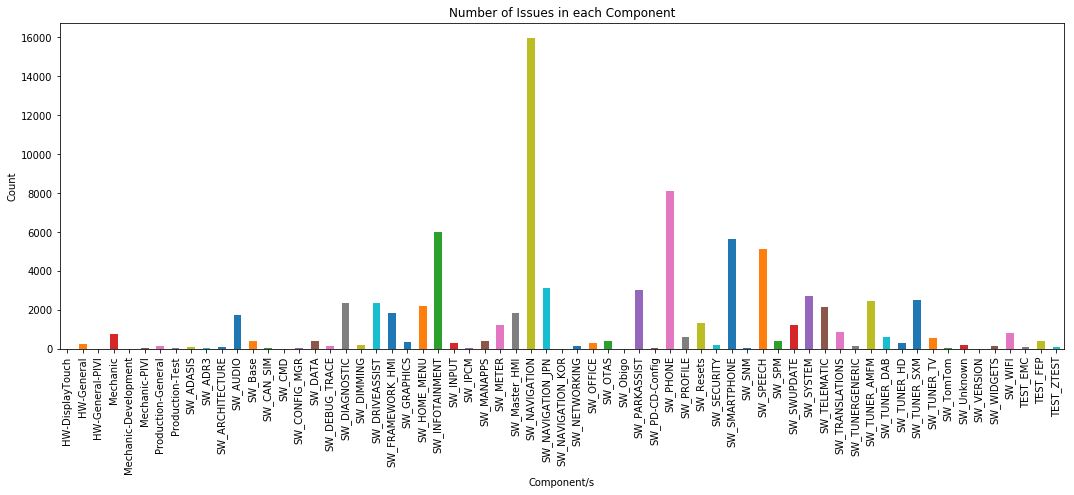

In [7]:
fig = plt.figure(figsize=(18,6))
df.groupby('Component/s').Summary.count().plot.bar(ylim=0)
plt.ylabel('Count')
plt.title('Number of Issues in each Component')
plt.show()

In [8]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Summary).toarray()
labels = df.component_id
features.shape

(82592, 24749)

In [9]:
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'HW-DisplayTouch':
  . Most correlated unigrams:
       . failure
       . blue
  . Most correlated bigrams:
       . short press
       . blue screen
# 'HW-General':
  . Most correlated unigrams:
       . pcb
       . g01
  . Most correlated bigrams:
       . 6953 g01
       . mainboard 6598
# 'HW-General-PIVI':
  . Most correlated unigrams:
       . adapter
       . insufficient
  . Most correlated bigrams:
       . reset connect
       . displays black
# 'Mechanic':
  . Most correlated unigrams:
       . silverbox
       . fascia
  . Most correlated bigrams:
       . ivi scope2
       . nissan ivi
# 'Mechanic-Development':
  . Most correlated unigrams:
       . l42n
       . packaging
  . Most correlated bigrams:
       . map screen
       . short press
# 'Mechanic-PIVI':
  . Most correlated unigrams:
       . holes
       . dsb2
  . Most correlated bigrams:
       . silverbox nissan
       . dvd variant
# 'Production-General':
  . Most correlated unigrams:
       . assure
       

# 'SW_TUNER_DAB':
  . Most correlated unigrams:
       . dr
       . dab
  . Most correlated bigrams:
       . dab fm
       . renault dab
# 'SW_TUNER_HD':
  . Most correlated unigrams:
       . sps
       . hd
  . Most correlated bigrams:
       . hd radio
       . renault hd
# 'SW_TUNER_SXM':
  . Most correlated unigrams:
       . sports
       . sxm
  . Most correlated bigrams:
       . sxm sports
       . sxm audio
# 'SW_TUNER_TV':
  . Most correlated unigrams:
       . tv
       . dtv
  . Most correlated bigrams:
       . dtv screen
       . dtv video
# 'SW_TomTom':
  . Most correlated unigrams:
       . closure
       . river
  . Most correlated bigrams:
       . destination data
       . poi online
# 'SW_Unknown':
  . Most correlated unigrams:
       . library
       . productdefinition
  . Most correlated bigrams:
       . productdefinition library
       . missing productdefinition
# 'SW_VERSION':
  . Most correlated unigrams:
       . key
       . spi
  . Most correlated bigr

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['Summary'], df['Component/s'], random_state = 0,test_size=0.1)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)



In [11]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)
clf

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

In [13]:
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few

In [14]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.728096
LogisticRegression        0.702852
MultinomialNB             0.601949
RandomForestClassifier    0.193155
Name: accuracy, dtype: float64

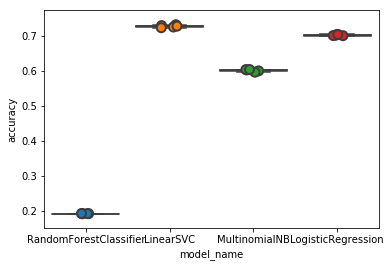

In [15]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=9, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [16]:
model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.1, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [17]:
np.mean(y_test==y_pred)

0.7343825665859565

In [18]:
Error.err.err(y_test,y_pred)

0 0.8364565587734242
1 0.6744186046511628
2 0.4661016949152542
3 0.8989192625556262
4 0.5669014084507042
5 0.7767857142857143
6 0.8563106796116505
7 0.762589928057554
8 0.831858407079646
9 0.775
10 0.8168761220825853
11 0.5584905660377358
12 0.8808510638297873
13 0.8244897959183674
14 0.6694214876033058
15 0.6615384615384615
16 0.8053435114503816
17 0.625
18 0.40828402366863903
19 0.8710801393728222
20 0.2
21 0.696969696969697
22 0.6338028169014085
23 0.5789473684210527
24 0.8235294117647058
25 0.7741935483870968
26 0.6666666666666666
27 1.0
28 0.15
29 0.30337078651685395
30 0.325
31 0.3424657534246575
32 0.22580645161290322
33 0.0
34 0.14285714285714285
35 0.5416666666666666
36 0.16666666666666666
37 0.0
38 0.6904761904761905
39 0.0
40 0.4
41 0.46511627906976744
42 0.3333333333333333
43 0.5405405405405406
44 0.8484848484848485
45 0.0
46 0.0
47 0.25
48 0.4666666666666667
49 0.8888888888888888
50 0.0
51 1.0
52 0.5
53 0.14285714285714285
54 0.375
56 0.45454545454545453
58 0.0
60 0.5
61 0